In [66]:
import dimers_util
import dimers_analysis
import dimers_sim
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib
from importlib import reload 
import pickle
from scipy.optimize import curve_fit
import os
import time
reload(dimers_util)
reload(dimers_sim)
reload(dimers_analysis)

<module 'dimers_analysis' from 'C:\\Users\\ofira\\OneDrive\\מסמכים\\GitHub\\DymerKrylov\\dimers_analysis.py'>

In [268]:
exps = [ 'cluster2468_ic_experiment_L2200_t1500_d[60]____2023_01_27__13_46.pickle',
         'cluster1204_ic_experiment_L1900_t1500_d[60]____2023_01_27__08_13.pickle',
         'cluster9116_ic_experiment_L1700_t1500_d[60]____2023_01_27__00_43.pickle',
         'cluster3671_ic_experiment_L1500_t1500_d[60]____2023_01_27__01_54.pickle',
         'cluster3795_ic_experiment_L1300_t1500_d[60]____2023_01_26__22_27.pickle',
         'd_ic_experiment_L300_t1500_d[60]____2023_01_26__15_06.pickle']
exp_files = []
for path in exps:
    with open("analyses/varying_initial_conditions/"+path, 'rb') as f:
        exp_files.append(pickle.load(f))
file_name= "Long_time_experiment1"
experiment = dimers_sim.Experiment(file_name + time.strftime("%Y_%m_%d__%H_%M"),
                                      "analyses/good",
                                      [e.results[0] for e in exp_files],
                                      description='Long time experiment with d=60')

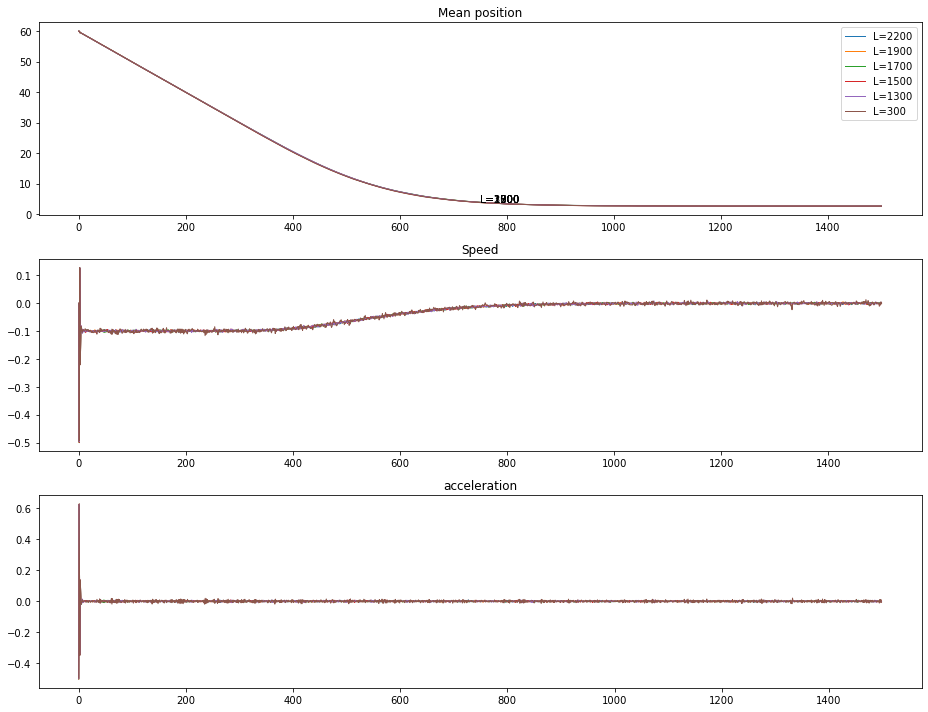

In [269]:
dimers_analysis.plot_analyses(experiment.results, label='L')

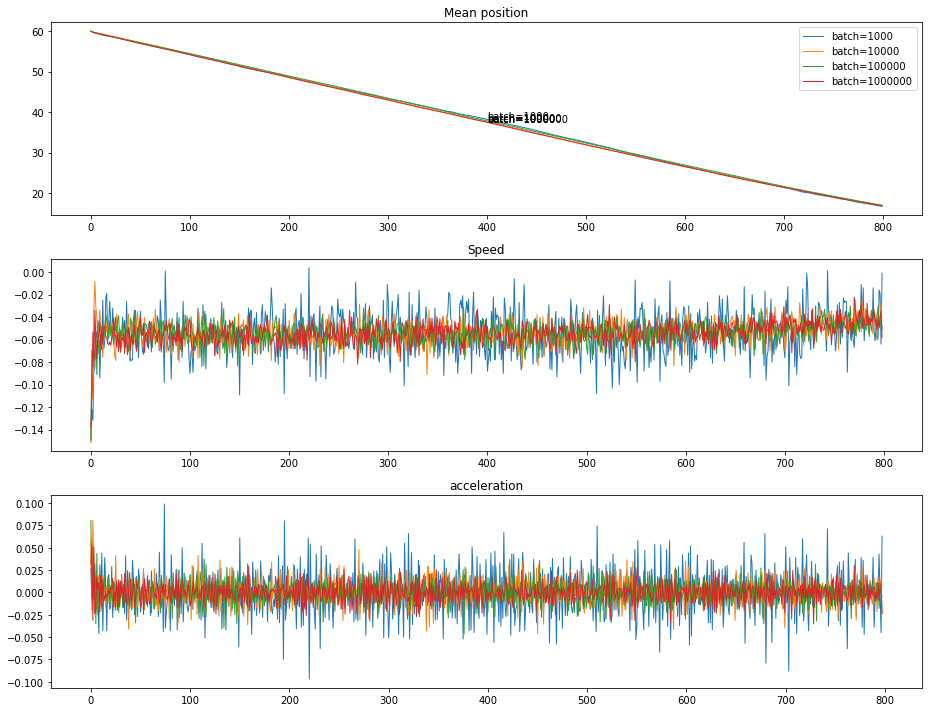

In [71]:
exps = [ 'cluster5674_bs_experiment_L500_t800_b[1000, 10000, 100000, 1000000]____2023_02_26__06_32.pickle']
exp_files = []
for path in exps:
    with open("analyses/varying_batch_size/"+path, 'rb') as f:
        exp_files.append(pickle.load(f))
file_name= "new bs experiment"
experiment = dimers_sim.Experiment(file_name + time.strftime("%Y_%m_%d__%H_%M"),
                                      "analyses/good",
                                      [e for e in exp_files[0].results],
                                      description='Long time experiment with d=60')
dimers_analysis.plot_analyses(experiment.results, label='batch')

In [60]:
type(exp_files[0].results[0])

dimers_analysis.Analysis

In [250]:
def plot_average_dynamics(experiment, label, win=10, ti=0):
    x_t = {}
    v_t = {}
    a_t = {}
    for ana in experiment.results:
        t = ana.times
        x = np.array([np.mean(ana.analysis['Mean'][t_curr : t_curr + win]) for t_curr in range(ti, t - win)])
        x_t[getattr(ana, label)] = x
        #v = np.array([np.mean(ana.analysis['speed'][t_curr : t_curr + win]) for t_curr in range(ti, t - win)])
        v = x[1:] - x[:-1]
        v_t[getattr(ana, label)] = v
        #a = np.array([np.mean(ana.analysis['acc'][t_curr : t_curr + win]) for t_curr in range(ti, t - win)])
        a_t[getattr(ana, label)] = v[1:] - v[:-1]
        
    plt.figure(1, figsize=(10,8))
    plt.subplot(211)
    for k in v_t:
        plt.plot(v_t[k], label=str(k))
    plt.title('speed')
    plt.legend()
    #plt.xticks(np.arange(ti,tf, 50))
    
    plt.subplot(212)
    for k in a_t:
        plt.plot(a_t[k], label=str(k))
    plt.title("acceleration")
    plt.legend()
    #plt.xticks(np.arange(ti,tf, 50))
    
    plt.show()
    
    return v_t, a_t

In [14]:
def plot_fit(ana, times,f, label, p0=None):
    ana_times = (ana.times*times).astype(np.int32)
    plt.figure(1, figsize=(8,16))
    for i, t in enumerate(zip(times, ana_times)):
        plt.subplot(100*len(times) + 10 +i+1)
        popt_t, pcov_t, x_max, x_min = dimers_analysis.dist_fit(ana, f, t[1], p0)
        xrange = np.arange(x_min, x_max)
        y = ana.rho[t[1],x_min:x_max]
        plt.plot(xrange, y, label="Simulation L={}".format(str(ana.L)))
        plt.plot(xrange, f(xrange, *popt_t),label="{} L={}".format(label, str(ana.L)))
        plt.title("t={}".format(t[0]))
        plt.legend()
    plt.tight_layout()
    plt.show()

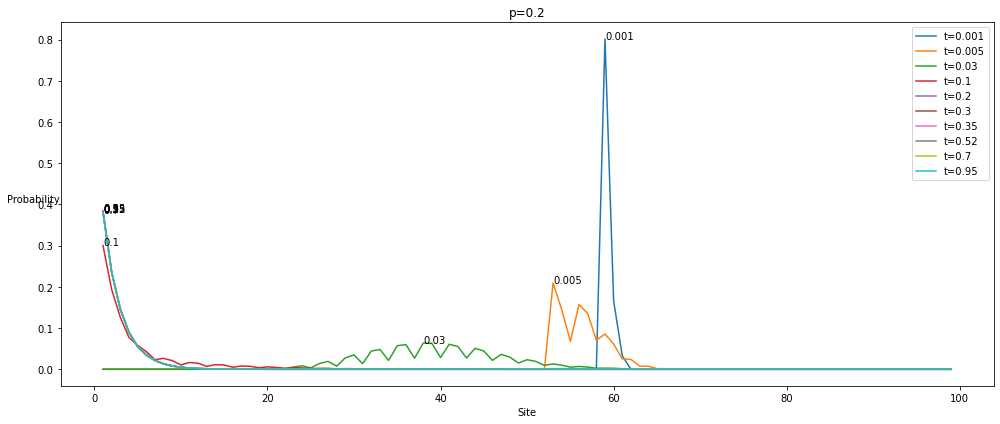

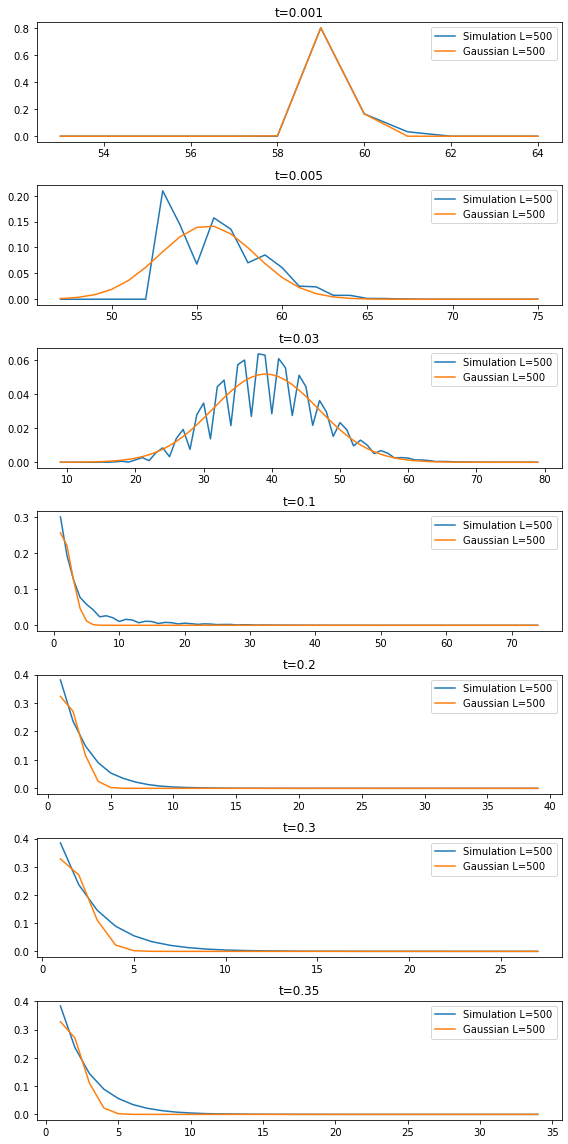

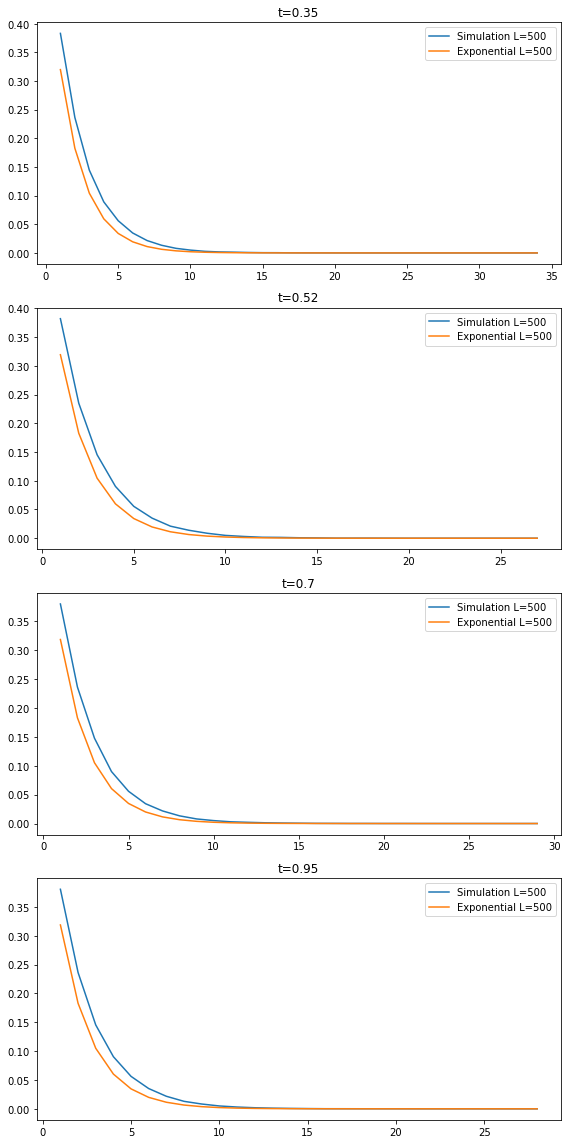

In [23]:
times = np.array([0.001, 0.005, 0.03, 0.1, 0.2, 0.3, 0.35, 0.52, 0.70, 0.95])

ana = experiment.results[5]    
dimers_analysis.plot_dist(ana, times, title="p={}".format(ana.analysis['p']), site_max=100)
plot_fit(ana, times[:7], dimers_analysis.gaussian, "Gaussian", p0=None)
plot_fit(ana, times[6:], dimers_analysis.exponential, "Exponential", p0=5)

In [126]:
p = [0.0001, 0.0003, 0.0006, 0.001,  0.01, 0.2, 0.7]
exps = ['d_ic_experiment_L40_t600_d[30]_p0.0001____2023_02_15__12_43.pickle']
exp_files = []
for _p, path in zip(p, exps):
    with open("analyses/varying_p/"+path, 'rb') as f:
        a = pickle.load(f)
        a.results[0].analysis['p'] = _p
        exp_files.append(a)
file_name= "varying_p_test"
experiment = dimers_analysis.Experiment(file_name + time.strftime("%Y_%m_%d__%H_%M"),
                                      "analyses/good",
                                      [e.results[0] for e in exp_files],
                                      description='Long time experiment with d=60')

FileNotFoundError: [Errno 2] No such file or directory: 'analyses/varying_p/d_ic_experiment_L40_t600_d[30]_p0.0001____2023_02_15__12_43.pickle'

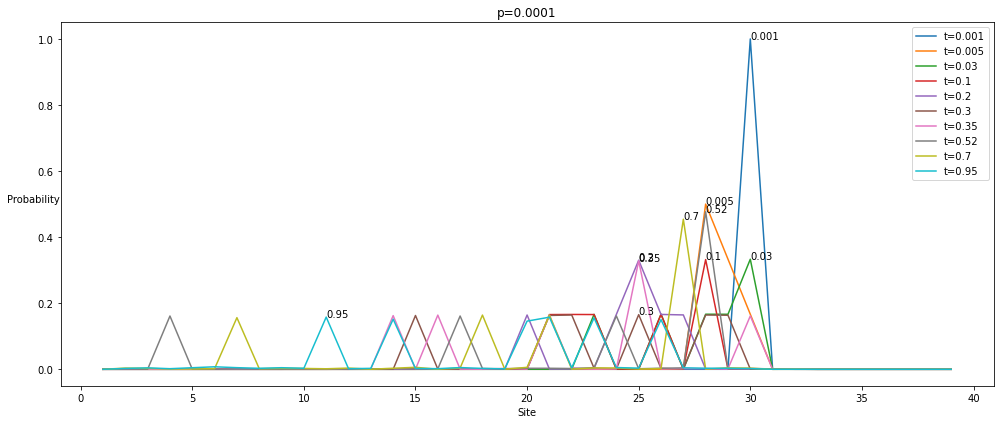

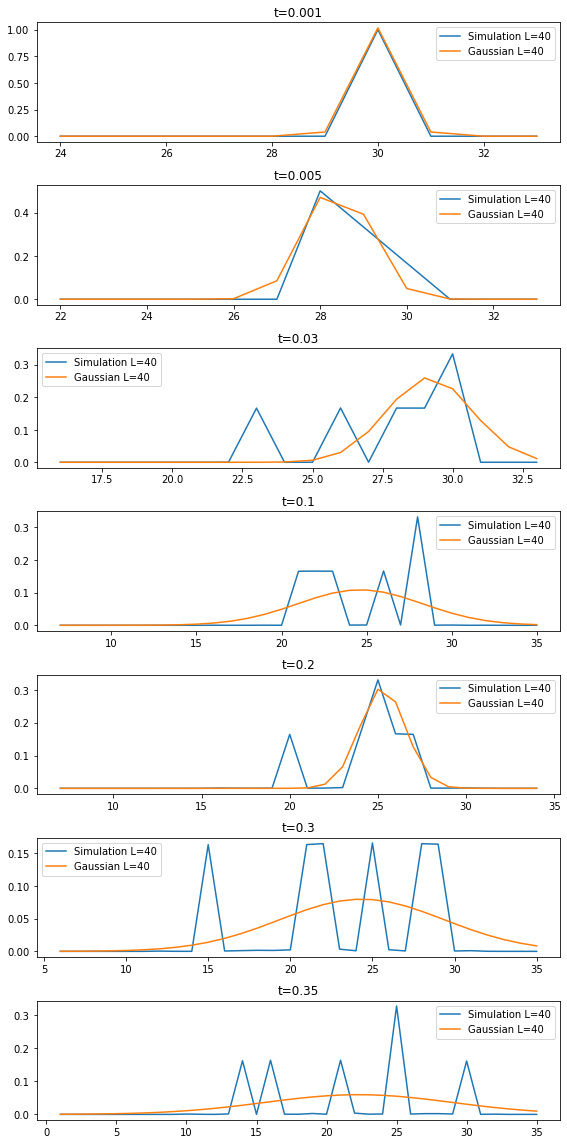

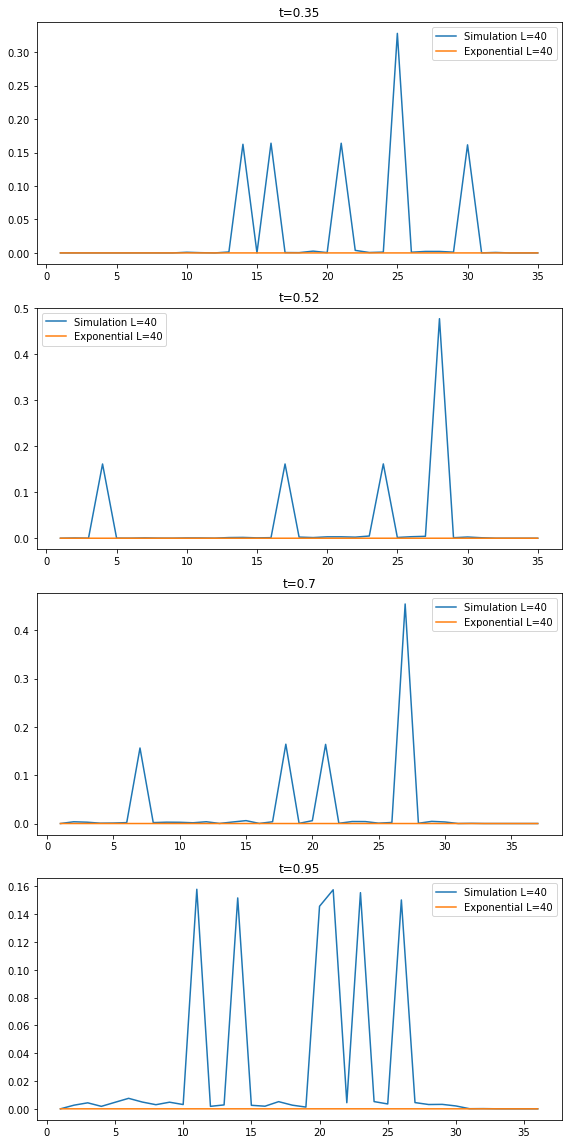

In [29]:
times = np.array([0.001, 0.005, 0.03, 0.1, 0.2, 0.3, 0.35, 0.52, 0.70, 0.95])

ana = experiment.results[0]    
dimers_analysis.plot_dist(ana, times, title="p={}".format(ana.analysis['p']), site_max=40)
plot_fit(ana, times[:7], dimers_analysis.gaussian, "Gaussian", p0=None)
plot_fit(ana, times[6:], dimers_analysis.exponential, "Exponential", p0=5)

TypeError: list indices must be integers or slices, not list

In [1]:

exps = ['cluster3122_ic_experiment_L800_t3000_d[60]_p1e-06____2023_03_01__23_21.pickle',
        'cluster1271_ic_experiment_L800_t3000_d[60]_p1e-05____2023_03_01__23_16.pickle',
        'cluster2782_ic_experiment_L800_t3000_d[60]_p0.0001____2023_03_01__23_39.pickle',
        'cluster4247_ic_experiment_L800_t3000_d[60]_p0.001____2023_03_01__22_33.pickle',
        'cluster1899_ic_experiment_L800_t3000_d[60]_p0.01____2023_03_01__22_45.pickle',
        'cluster4915_ic_experiment_L800_t3000_d[60]_p0.1____2023_03_01__22_03.pickle',
        'cluster9194_ic_experiment_L800_t3000_d[60]_p0.15____2023_03_01__21_54.pickle',
        'cluster8388_ic_experiment_L800_t3000_d[60]_p0.2____2023_03_01__21_23.pickle',
        'cluster5750_ic_experiment_L800_t3000_d[60]_p0.35____2023_03_01__20_58.pickle',
        'cluster8325_ic_experiment_L800_t3000_d[60]_p0.5____2023_03_01__19_20.pickle',
        'cluster2131_ic_experiment_L800_t3000_d[60]_p0.75____2023_03_01__17_58.pickle',
        'cluster6562_ic_experiment_L800_t3000_d[60]_p0.95____2023_03_01__17_23.pickle']
p_list = [1e-6, 1e-5, 0.0001, 0.001, 0.01, 0.1, 0.15, 0.2, 0.35, 0.5, 0.75, 0.95]
exp_files = []
for path, p in zip(exps, p_list):
    with open("analyses/varying_p/"+path, 'rb') as f:
        _e = pickle.load(f)
        _e.results[0].analysis['p'] = p
        exp_files.append(_e)
file_name= "varying_p_test"
experiment = dimers_sim.Experiment(file_name + time.strftime("%Y_%m_%d__%H_%M"),
                                      "analyses/good",
                                      [e.results[0] for e in exp_files],
                                      description='Long time experiment with d=60')
show_results = [experiment.results[0], experiment.results[2], experiment.results[4],experiment.results[9], experiment.results[11]]
dimers_analysis.plot_analyses(show_results, label='p')

NameError: name 'pickle' is not defined

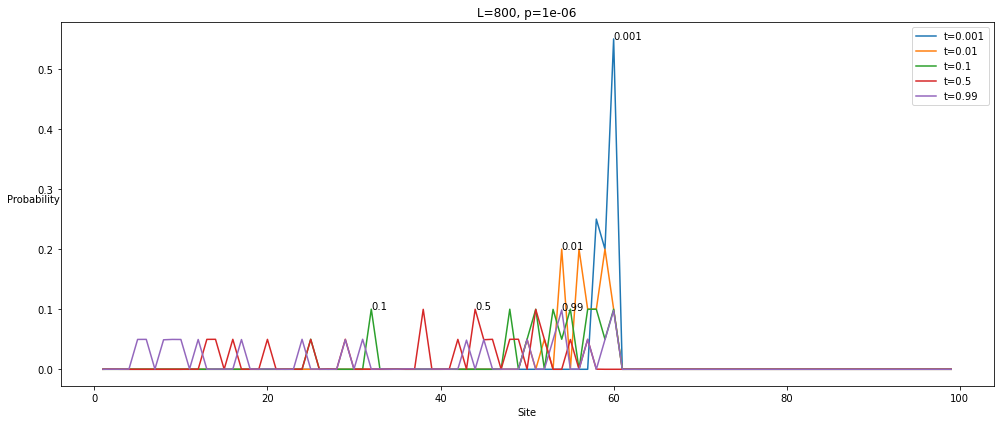

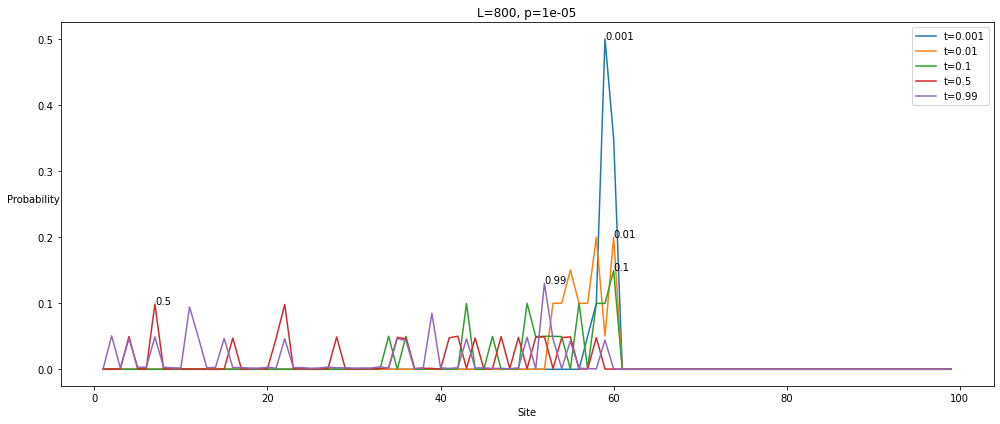

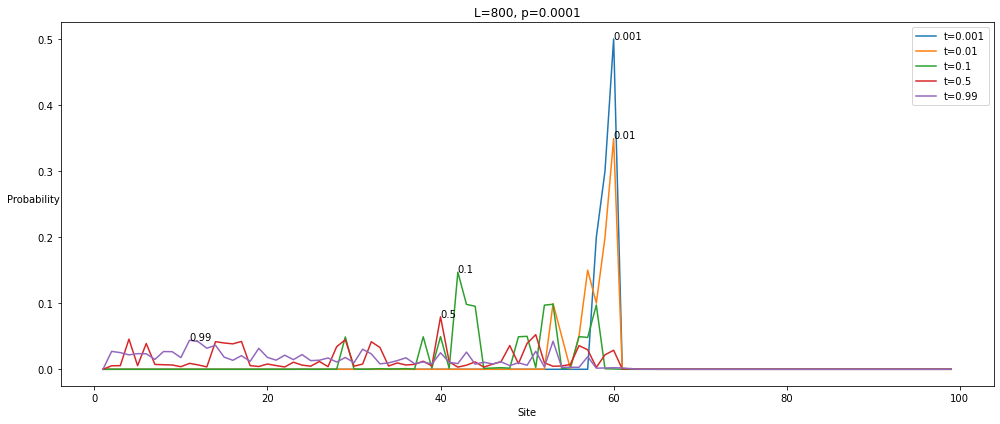

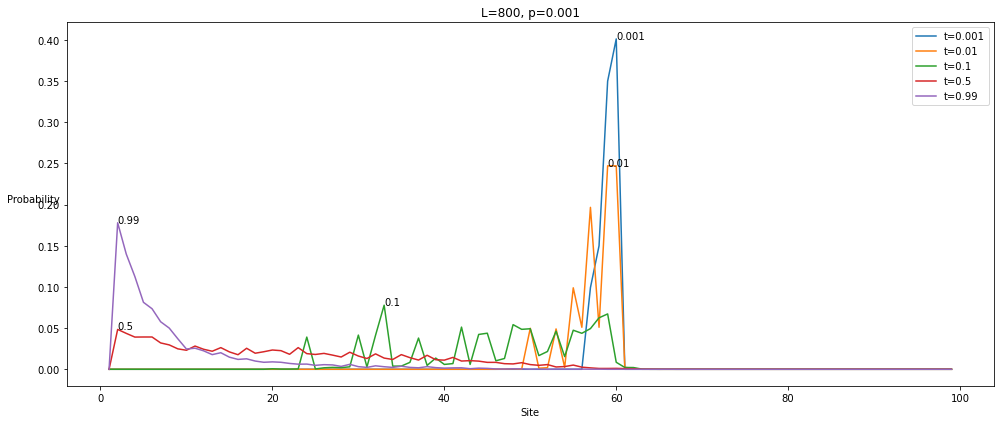

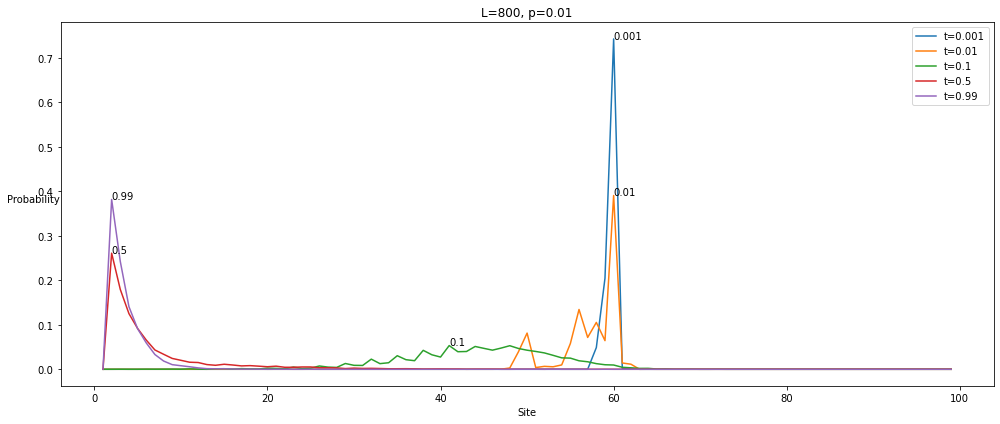

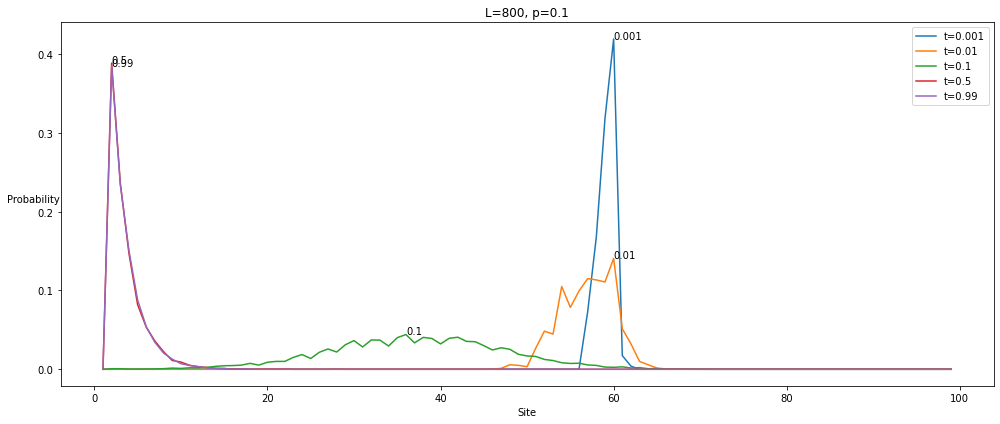

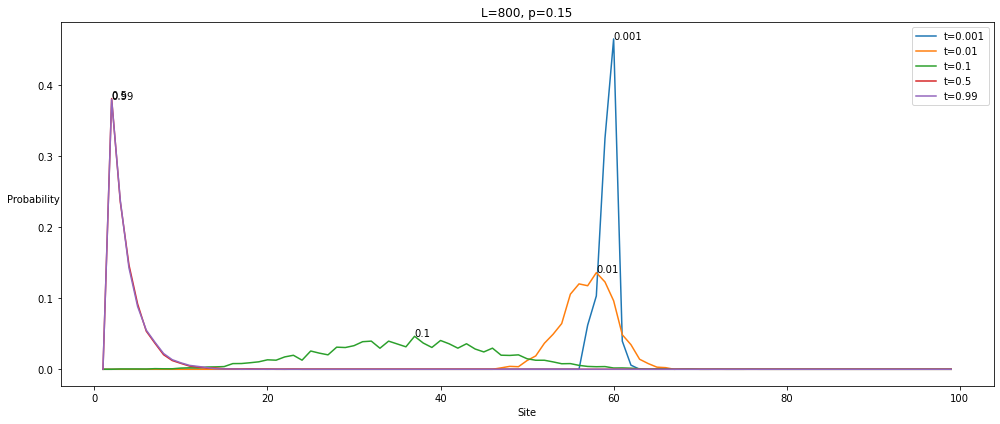

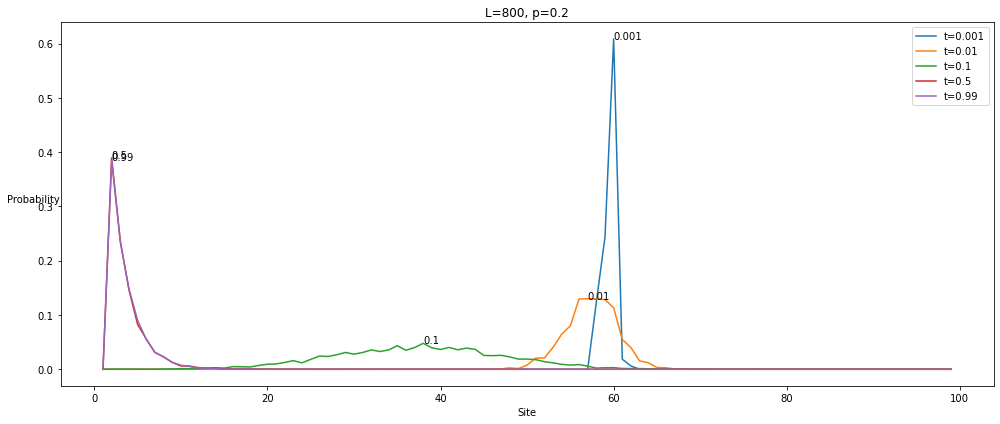

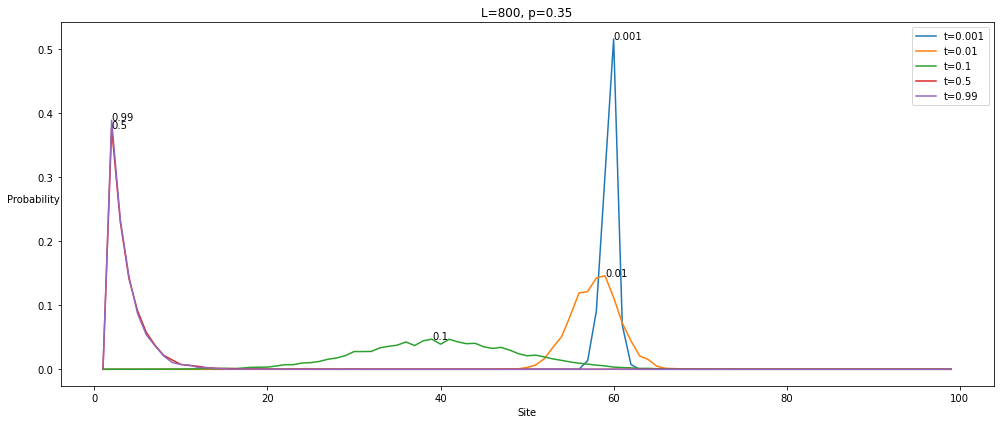

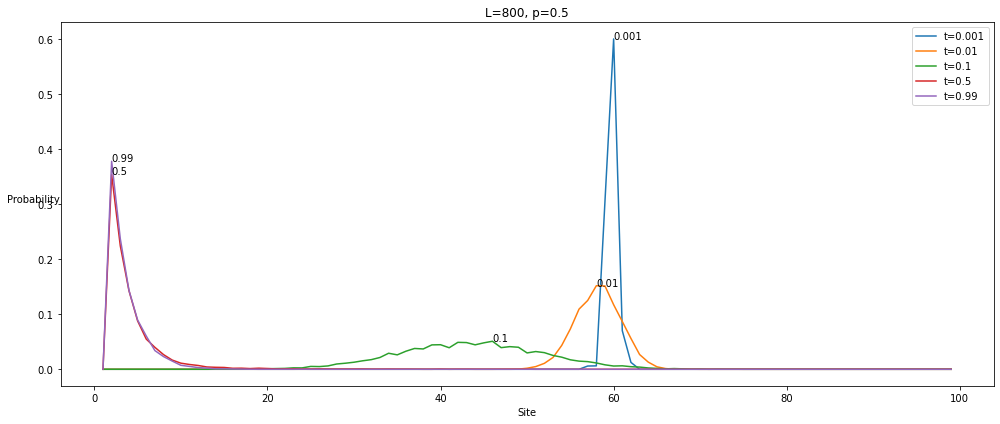

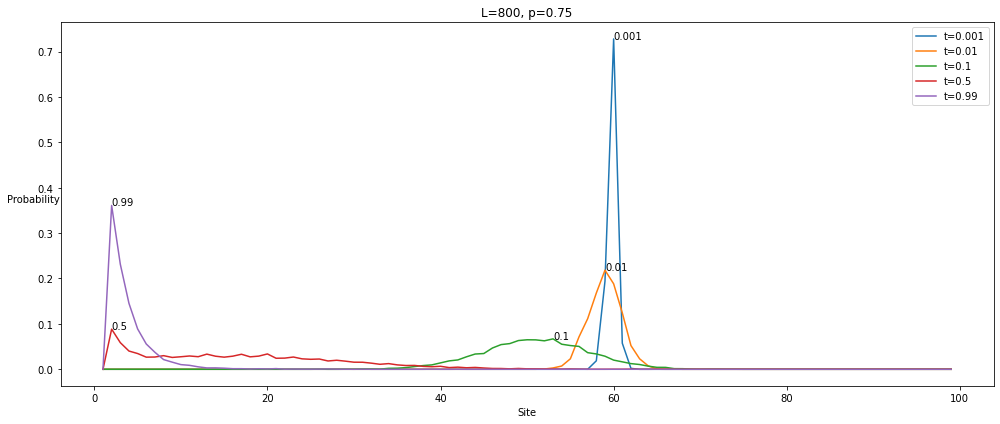

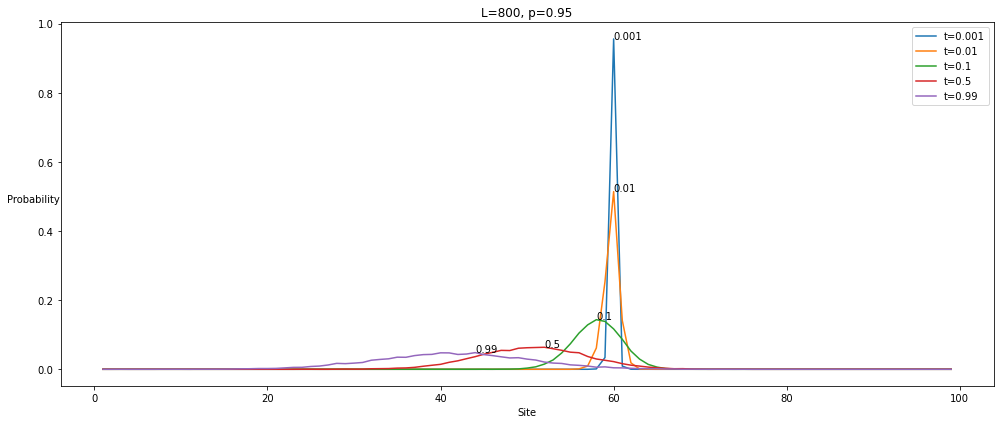

In [101]:
times = np.array([0.001, 0.01, 0.1, 0.5, 0.99])
#ana = experiment.results[0]

ana_times = (ana.times*times//10).astype(np.int32)
for ana in experiment.results:
    dimers_analysis.plot_dist(ana, times, title="L={}, p={}".format(ana.analysis['L'], ana.analysis['p']), site_max=100)

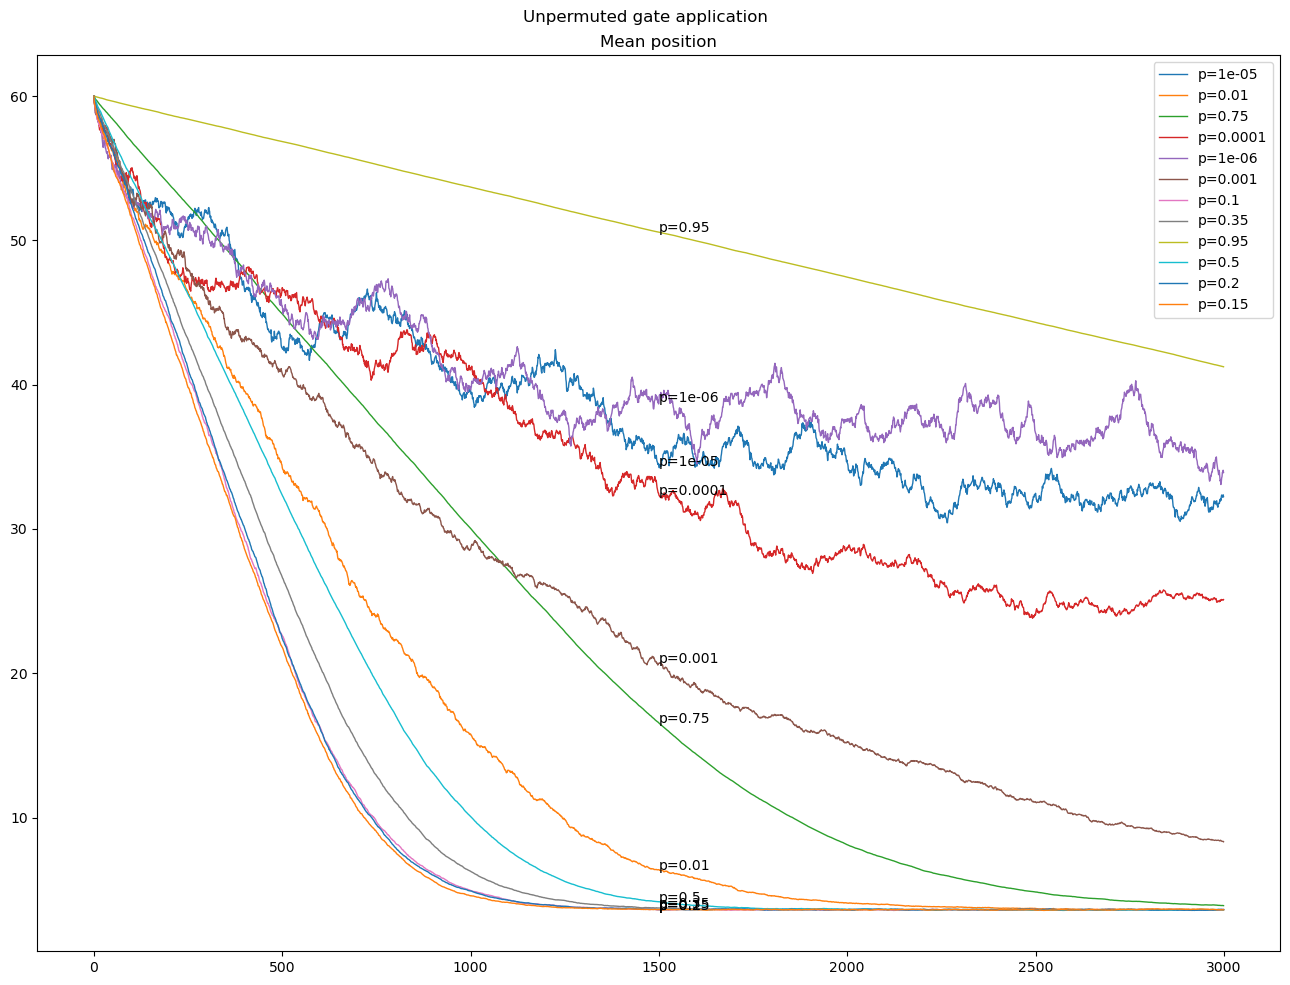

In [67]:
unpermuted_paths = [p for p in os.listdir('analyses/varying_p') if 'permutation' not in p and '.pickle' in p]
unpermuted = dimers_analysis.get_experiments_from_paths(unpermuted_paths, file_name="varying_p_test_unpermuted", description="varying_p_test_unpermuted L800 d60 t3000")
dimers_analysis.plot_analyses(unpermuted.results, label='p', title="Unpermuted gate application")

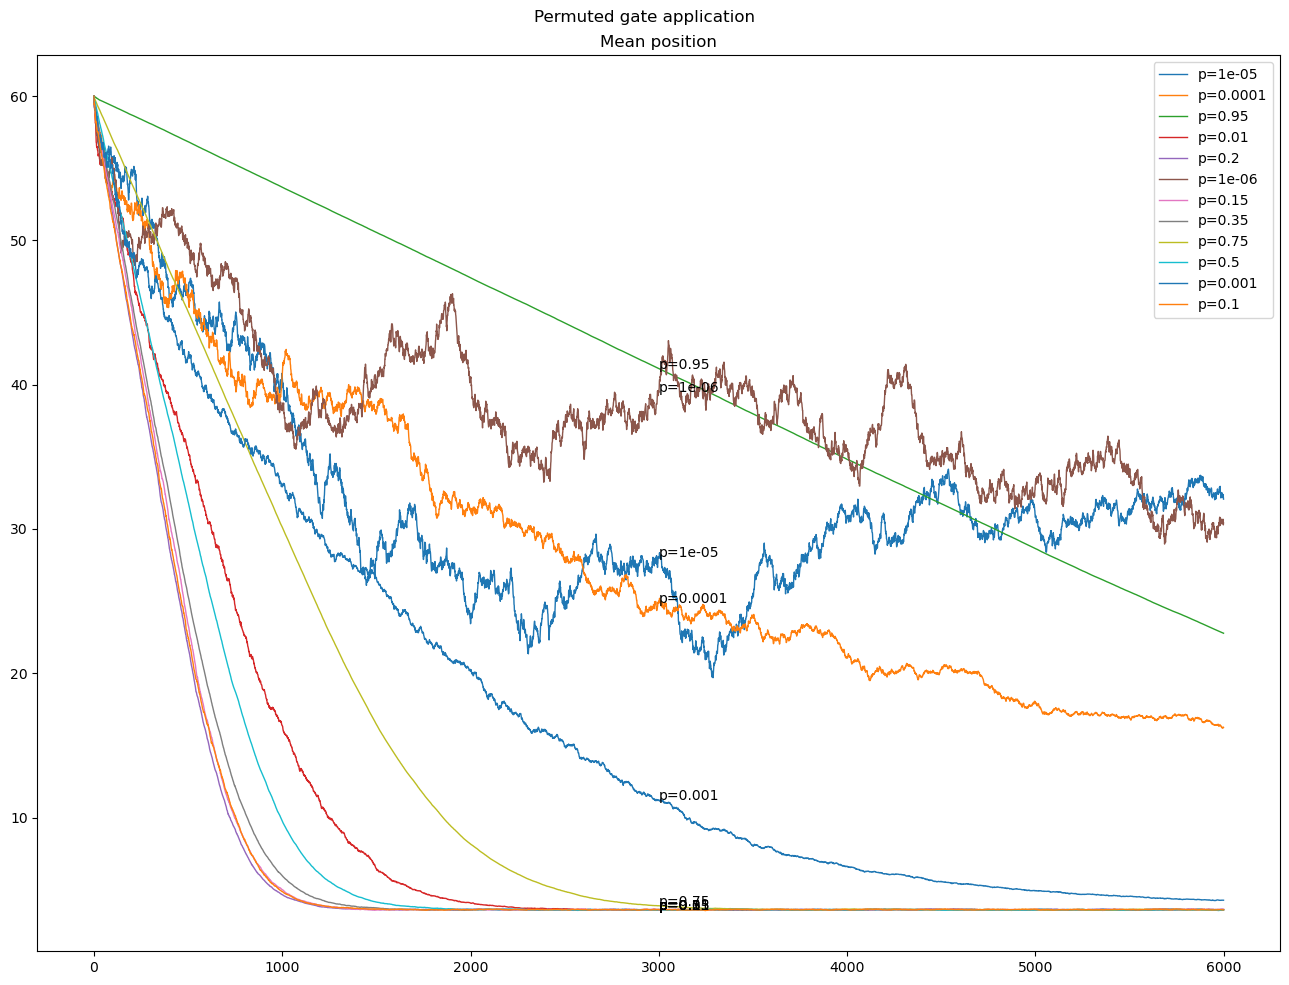

In [69]:
permuted_paths = [p for p in os.listdir('analyses/varying_p') if 'permutation' in p and '.pickle' in p]
permuted = dimers_analysis.get_experiments_from_paths(permuted_paths, file_name="varying_p_test_unpermuted", description="varying_p_test_unpermuted L800 d60 t3000")
dimers_analysis.plot_analyses(permuted.results, label='p', title="Permuted gate application")

In [41]:
for i,res in enumerate(unpermuted.results):
    print(i)
    res.analysis['p']

0
1
2
3
4
5
6
7
8
9
10


KeyError: 'p'

In [52]:
with open('analyses/varying_p/'+'cluster2782_ic_experiment_L800_t3000_d[60]_p0.0001____2023_03_01__23_39.pickle', 'rb') as f:
    _e = pickle.load(f)
    _e.results[0].analysis['p'] = 0.0001
    _e.save()
    print(_e.results[0].analysis['p'])

0.0001


In [70]:
with open("analyses/good/varying_p_test2023_03_22__15_38.pickle", 'rb') as f:
        experiment=pickle.load(f)
experiment.results[0]

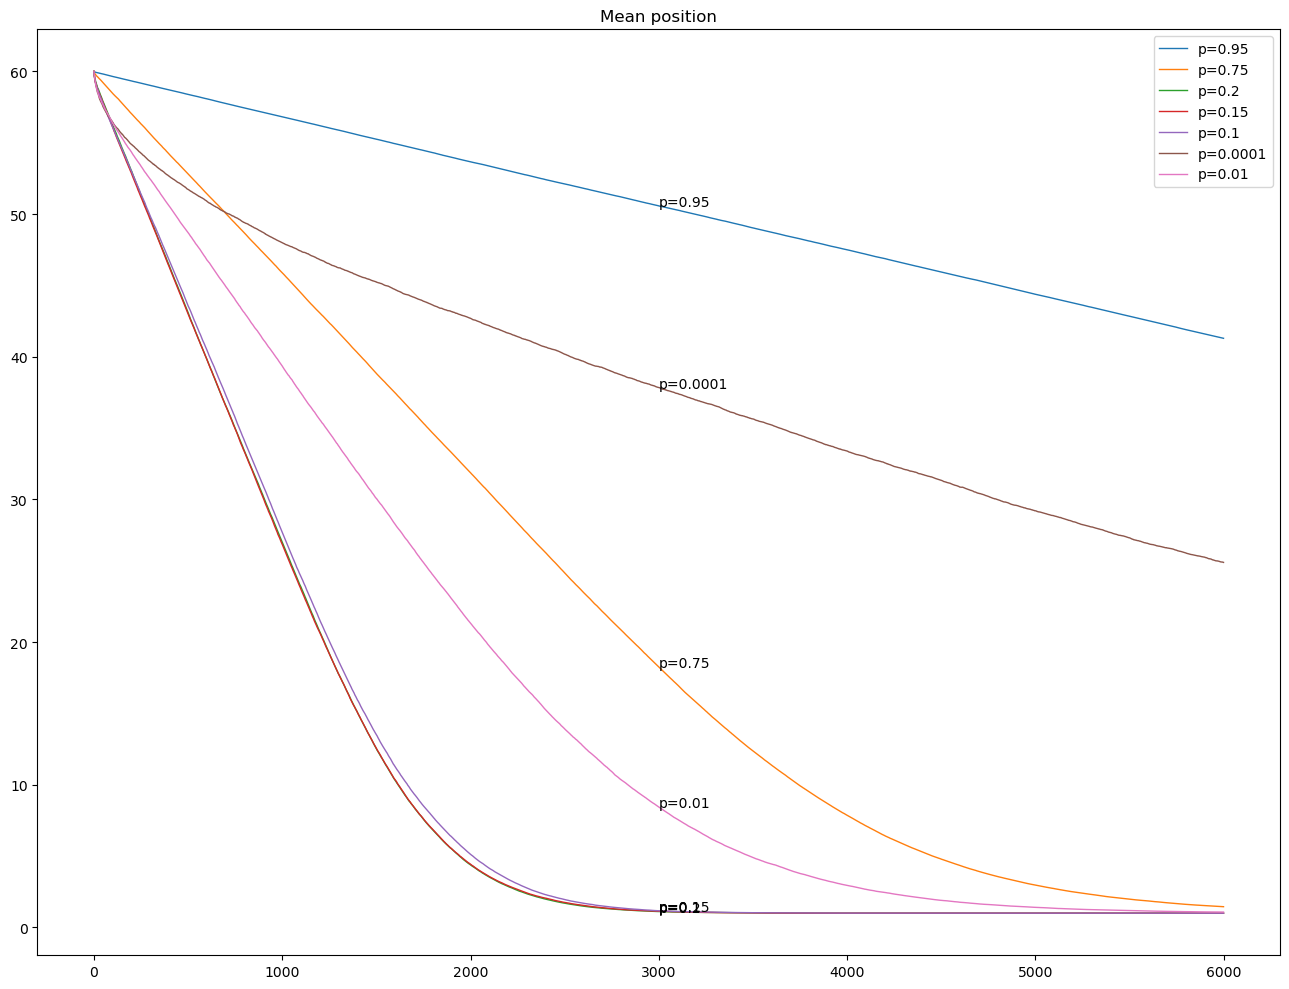

In [72]:
show_results = [experiment.results[0], experiment.results[1], experiment.results[4], experiment.results[5], experiment.results[6], experiment.results[10], experiment.results[11]]
dimers_analysis.plot_analyses(show_results, label='p')

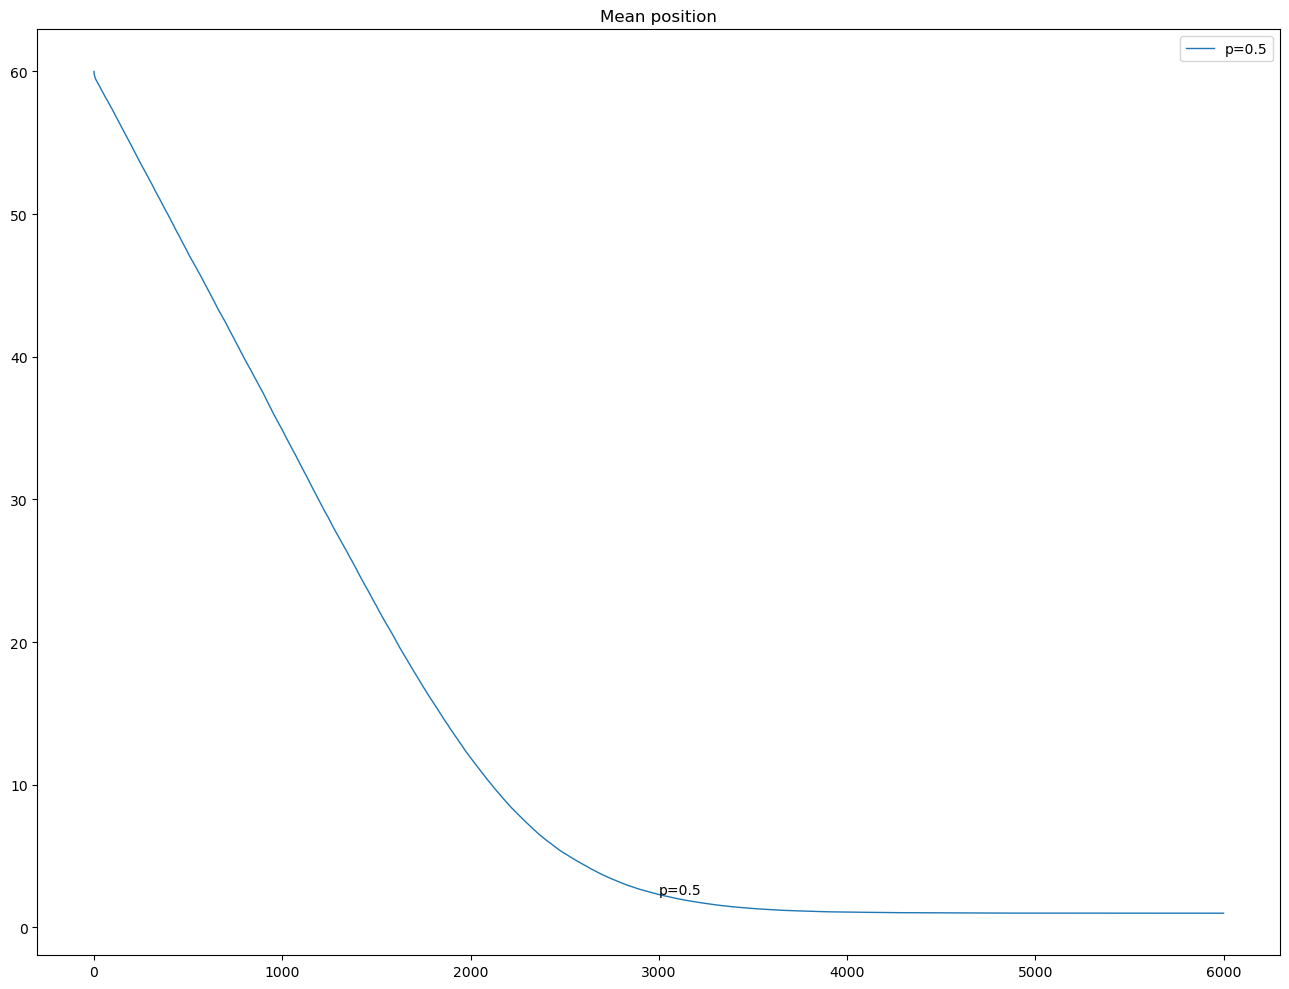

In [87]:
dimers_analysis.plot_analyses([experiment.results[3]], label='p')